# Map or aggragate Daymet v4 to Alaska Geospatial Fabric v2.0
This note book provides a quick check to the scripts in this repository that Map Daymet data to the Alaska fabric.  There are two sets of scripts in this repository.  The first, run_dm_ak_YEAR.py, runs the aggragation by decade (poor persons multiprocessing). The second, run_dm_ak_fill.py uses a nearest-neighbot algorithm to fill partially filled features.  In other words, if aggregagating gridded data that has nan or fillvalues to a feature will result in the feature have a nan/fillvalue.  This is common for example near coastlines.  

## Aggragating code
* run_dm_ak_1980.py
* run_dm_ak_YEAR.py etc.

## Fill missing code
* run_dm_ak_fill.py
* resulting nearest neighbor file is fill_missing_nearest.csv.  featid_left (missing) is filled by featid_right.  

## Fill leapyear code (Parker Norton) run in order
* swap_dims.sh
* daymet_fill_missing_days.sh

## Fabric file was generated from NHM_19.gdb.zip in sciecebase
* https://www.sciencebase.gov/catalog/item/5fc51e65d34e4b9faad8877b
* file created by extracting the hru's and then creating a new shapefile with just the geometry and nhru_id attribute.
* file: NHM_19_nhrus_c.shp (contact rmcd@usgs.gov)


In [26]:
import xarray as xr

The resulting data reside on denali:
* unfilled data: /caldera/projects/usgs/water/wbeep/onhm_dev/climate/alaska/gf20_dmv4_ak_filled
* Filled data: /caldera/projects/usgs/water/wbeep/onhm_dev/climate/alaska/gf20_dmv4_ak

Here for demonstration purposes we are using paths to files created on a local computer.


In [16]:
# Result of the run_dm_ak_YEAR.py scripts
xd = xr.open_dataset('../../data/NHM_19/1980_dm_ak.nc', engine='netcdf4')
# Result of the run_dm_ak_fill.py script
xd2 = xr.open_dataset('../../data/NHM_19/1980_dm_ak_filled.nc', engine='netcdf4')

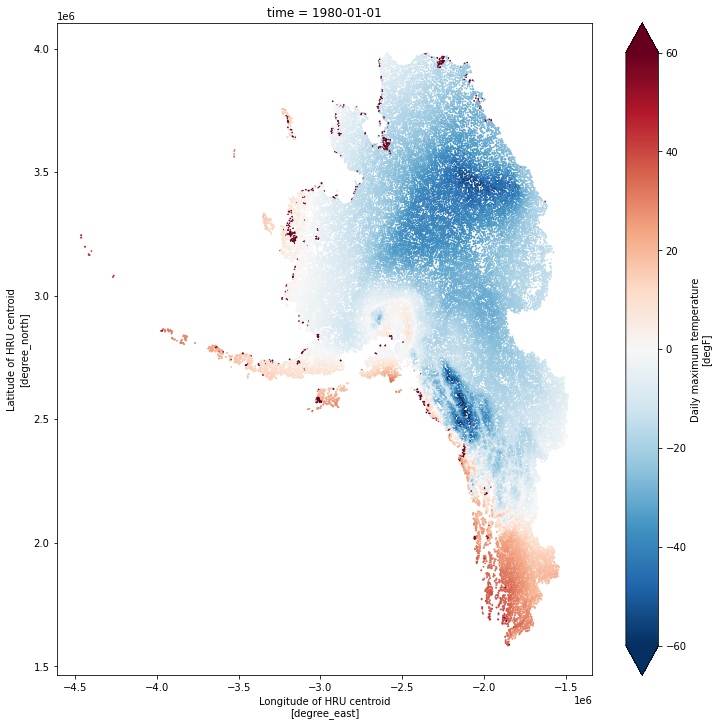

In [17]:
# Plot unfilled result - note high values along coastline.
xd.isel(time=0).plot.scatter(x='lon', y='lat',  hue='tmax', cmap='RdBu_r', vmin=-60, vmax=60, s=0.5, aspect=1, size=12)

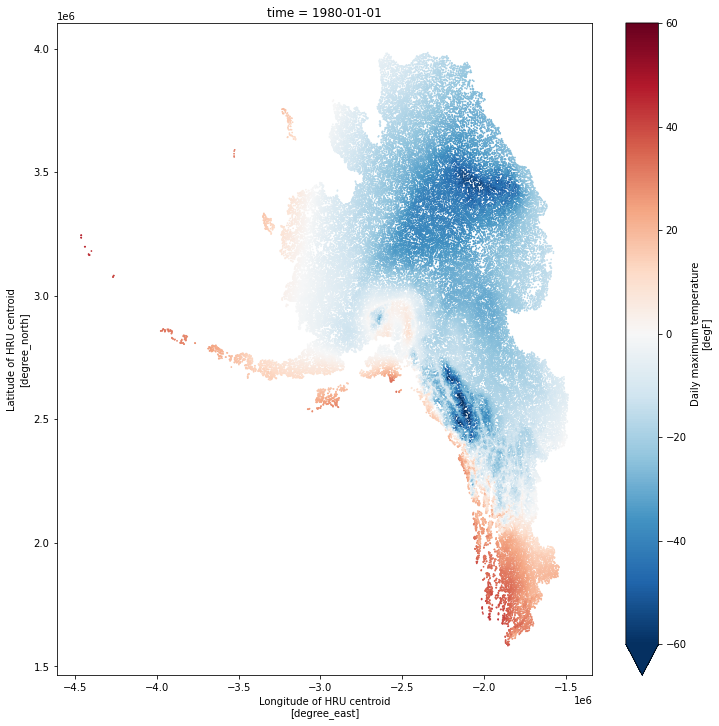

In [18]:
# Plot filled result - note no high values along coastline.
xd2.isel(time=0).plot.scatter(x='lon', y='lat',  hue='tmax', cmap='RdBu_r', vmin=-60, vmax=60, s=0.5, aspect=1, size=12)

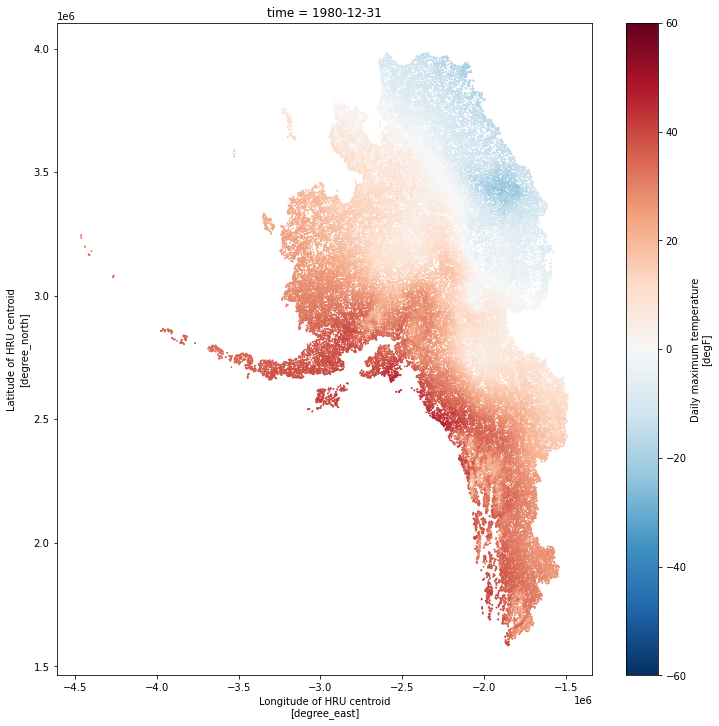

In [19]:
# Check filled leap year has 366 days, note time=365 is the 366 day (indexed by zero)
xd2.isel(time=365).plot.scatter(x='lon', y='lat',  hue='tmax', cmap='RdBu_r', vmin=-60, vmax=60, s=0.5, aspect=1, size=12)